KNN stands for K-Nearest Neighbours. KNN is simple classification algorithm and it is generally used for datasets in which data points are separated into several classes and we have to predict the class for the new sample point. KNN is non-parametric and lazy learning algorithm.

Non-parametric means that the algorithm does not make any assumptions on the given data distribution. Non-parametric covers technique that do not rely on data belonging to particular distribution and do not assume the structure of model to be fixed. So, KNN is used as classification algorithm in cases where we do not have much information about the distribution of the data.

KNN is referred to as Lazy algorithm since is does not use training points to do any generalization, which means that there is no separate training phase. KNN keeps all the training data and uses most of the training data during the testing phase. Thus, KNN does not learn any model, it make predictions on the fly, computing similarity between testing point and each training data point.

KNN algorithm is based on feature similarity. We can classify the testing data point on the basis of resemblance of its features with that of the training data set.


##**How to choose the correct value of 'K'?**


'K' in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process.


1. A very low value for K such as K = 1 or K = 2, can be noisy and lead to the effects of outliers in the model.
2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

KNN can be used for Classification as well as Regression.

While using KNN for classification - output is a class membership, we will classify the sample point using the technique of majority vote among its neighbors and the most common class among its K nearest neighbours is assigned to the testing point. In regression, output is the property value of object, this value is average or median of the value of its K nearest neighbors.

In classification, KNN is used to predict a class which is a discrete value whereas in regression, KNN predicts continuous values

###**Why don't we choose value value of K to be 1 ?**

Choosing the value of K to be 1 makes our model more prone to outliers and overfitting. Value of 1 means that we will consider only the closest (or nearest) neighbor to predict the class for our testing sample, and in majority of the cases it will lead to overfitting

##**Distance Metric for KNN**

There are various distance metrices that can be chosen such as Manhattan Distance, Euclidian Distance, etc.

$$Manhattan \;Distance = |\sum_{i=1}^n X_1^i - X_2^i|$$
$$Euclidian\; Distance = \sqrt{(\sum_{i=1}^n (X_1^i-X_2^i)^2)} $$

Where $X_1$ and $X_2$ are two different data points and $i$ traverses over all the features in the given dataset.

import pandas as pd
from sklearn import model_selection 
from sklearn.neighbors import KNeighborsClassifier

In [161]:
iris=pd.read_csv("iris.csv")

In [162]:
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [164]:
iris.shape

(150, 5)

In [165]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [166]:
X=iris.drop("variety",axis=1)

In [167]:
X.shape

(150, 4)

In [168]:
iris=iris.replace({"variety":{"Setosa":0,"Versicolor":1,"Virginica":2}})

In [169]:
Y=iris["variety"]

In [170]:
Y.shape

(150,)

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=.20,random_state=1)

In [179]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [180]:
z=clf.predict(X_test)

In [181]:
z

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2], dtype=int64)

In [182]:
Y_test

14     0
98     1
75     1
16     0
131    2
56     1
141    2
44     0
29     0
120    2
94     1
5      0
102    2
51     1
78     1
42     0
92     1
66     1
31     0
35     0
90     1
84     1
77     1
40     0
125    2
99     1
33     0
19     0
73     1
146    2
Name: variety, dtype: int64

In [183]:
clf.score(X_test,Y_test)

1.0

In [184]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,z)

1.0

## Part 2

Finding optimal value of k

In [243]:
from sklearn.model_selection import cross_val_score

In [248]:
xaxis=[]
yaxis=[]
for i in range(1,20,5):
    clf2 = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf2, xtrain, ytrain)  # By Default (5 folds)
    print(i,score.mean())
    xaxis.append(i)
    yaxis.append(score.mean())

1 0.95
6 0.9666666666666666
11 0.95
16 0.9416666666666667


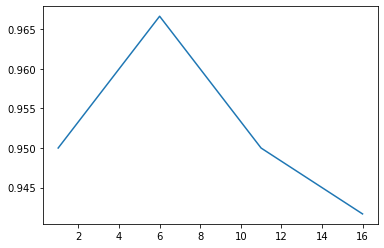

In [249]:
import matplotlib.pyplot as plt
plt.plot(xaxis,yaxis)
plt.show()

## Cross Validation 

In [216]:
import numpy as np
from sklearn import datasets

In [217]:
df=datasets.load_iris()

In [214]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(df.data,df.target,test_size=.20)

In [218]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [223]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, xtrain, ytrain)  # By Default (5 folds)

array([0.80802612, 0.93048476, 0.90968319, 0.96794544, 0.93873925])

In [231]:
cross_val_score(model, df.data, df.target, cv=3)  # cv specified 3 folds

array([0., 0., 0.])

In [235]:
cross_val_score(model, df.data, df.target) # on entire dataset 

array([0.        , 0.85124923, 0.        , 0.76155439, 0.        ])